In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera

In [2]:
# List of DJIA tickers as of April 2024
djia_tickers = [
    'MMM', 'AXP', 'AMGN', 'AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 
    'DIS', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 
    'NKE', 'NVDA', 'PG', 'CRM', 'SHW', 'TRV', 'UNH', 'VZ', 'V', 'WMT'
]

In [3]:
# Download daily adjusted close prices
data = yf.download(
    tickers=djia_tickers,
    start='2014-12-25',
    end='2025-04-18',
    progress=False,
    auto_adjust=False
)['Adj Close']

In [4]:
# Resample to weekly frequency, using Friday's close (or last trading day of week)
weekly_data = data.resample('W-FRI').last()
weekly_data

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-26,25.357044,121.925949,15.454500,80.959167,115.126564,71.558807,60.367439,20.452019,73.090767,87.488419,...,41.031940,42.938530,0.494139,69.693581,80.185890,84.779999,87.706406,62.045212,27.993448,23.652163
2015-01-02,24.320435,119.263039,15.426000,79.868713,113.657204,69.774216,58.818539,20.055145,72.658348,86.310013,...,40.072124,42.140312,0.483099,67.441566,79.456253,83.778847,86.192596,61.672886,27.467037,23.377295
2015-01-09,24.916597,116.160080,14.846500,77.864716,115.047836,66.561920,57.746216,20.185892,69.837975,86.770332,...,40.440647,42.566032,0.478539,67.299873,83.083336,84.088722,88.707039,60.628029,27.673620,24.316196
2015-01-16,23.577448,118.174011,14.537000,74.092926,114.383186,64.205925,56.237038,20.105988,67.843712,87.626526,...,39.626511,41.235691,0.479019,68.045601,82.901672,84.652870,90.460297,59.329498,28.401564,23.614061
2015-01-23,25.132374,119.203384,15.619500,72.448135,117.741699,65.545815,58.202946,20.490967,68.960228,87.203033,...,40.432068,42.641418,0.497018,67.650871,82.959175,85.018356,95.788559,60.106750,27.904427,24.087599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,218.270004,316.040009,196.210007,269.614929,178.110001,334.170990,280.179749,59.900082,164.750000,99.459999,...,391.260010,67.940002,117.699997,165.657410,334.410004,256.700012,516.849976,335.660004,43.294613,85.980003
2025-03-28,217.899994,306.950012,192.720001,264.601593,173.309998,328.110168,269.546478,60.456367,166.089996,98.070000,...,378.799988,63.290001,109.669998,166.989105,339.750000,261.790009,516.039978,342.850006,44.219753,85.150002
2025-04-04,188.380005,294.390015,171.000000,233.679993,136.589996,286.699554,240.382294,54.540001,143.279999,83.529999,...,359.839996,57.250000,94.309998,162.735611,332.059998,242.259995,525.049988,313.130005,42.349785,83.190002


In [5]:
# Simple Returns
percent_returns = weekly_data.pct_change().dropna()
hist_pct_ret = percent_returns.loc[:'2025-01-17']
trade_pct_ret = percent_returns.loc['2025-01-24':]

In [6]:
hist_pct_ret.to_csv('djia_hist_pct_ret.csv')
trade_pct_ret.to_csv('djia_trade_pct_ret.csv')

In [7]:
# Continuous Compounding
log_returns = np.log(weekly_data / weekly_data.shift(1)).dropna()
hist_log_ret = log_returns.loc[:'2025-01-17']
trade_log_ret = log_returns.loc['2025-01-24':]

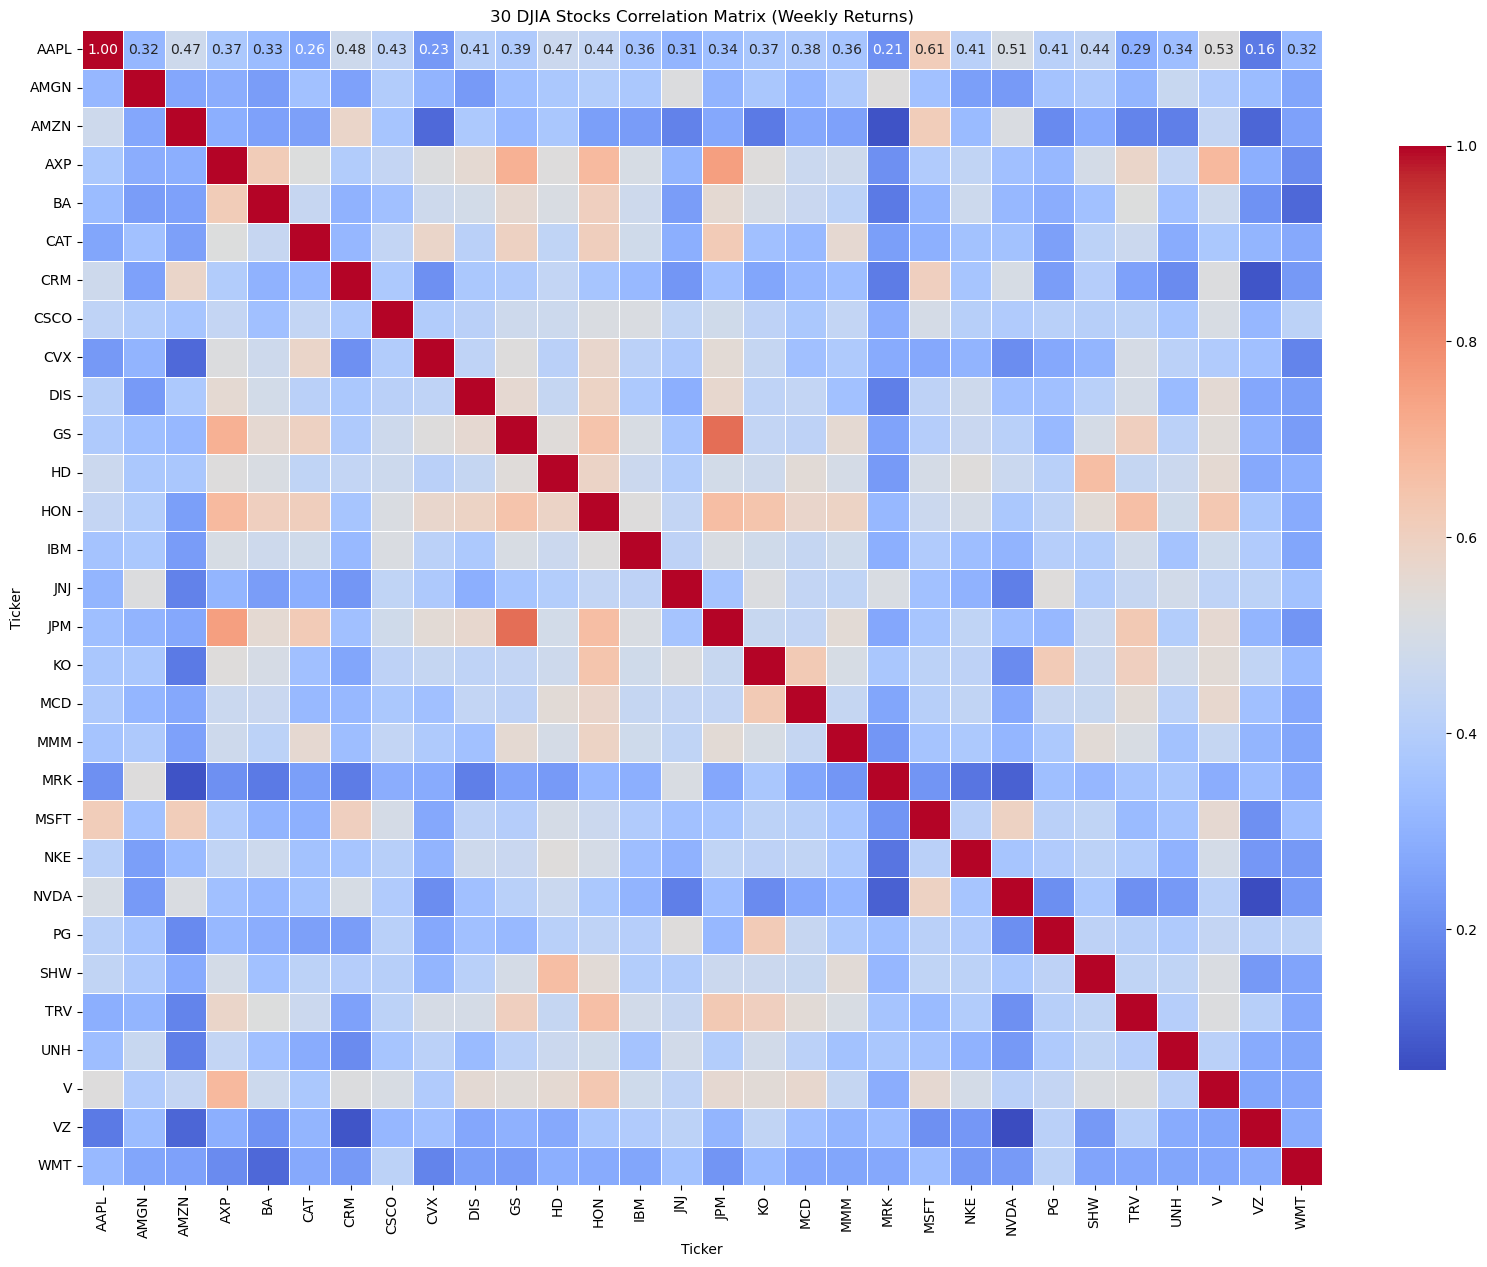

In [8]:
corr_matrix = hist_pct_ret.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink':0.8}, linewidths=0.5)
plt.title("30 DJIA Stocks Correlation Matrix (Weekly Returns)")
plt.show()

In [9]:
init_tickers = ['AMGN',	'AMZN',	'CAT', 'CVX', 'CSCO', 
                'KO', 'HD', 'HON', 'MRK', 'MSFT', 
                'PG', 'WMT']

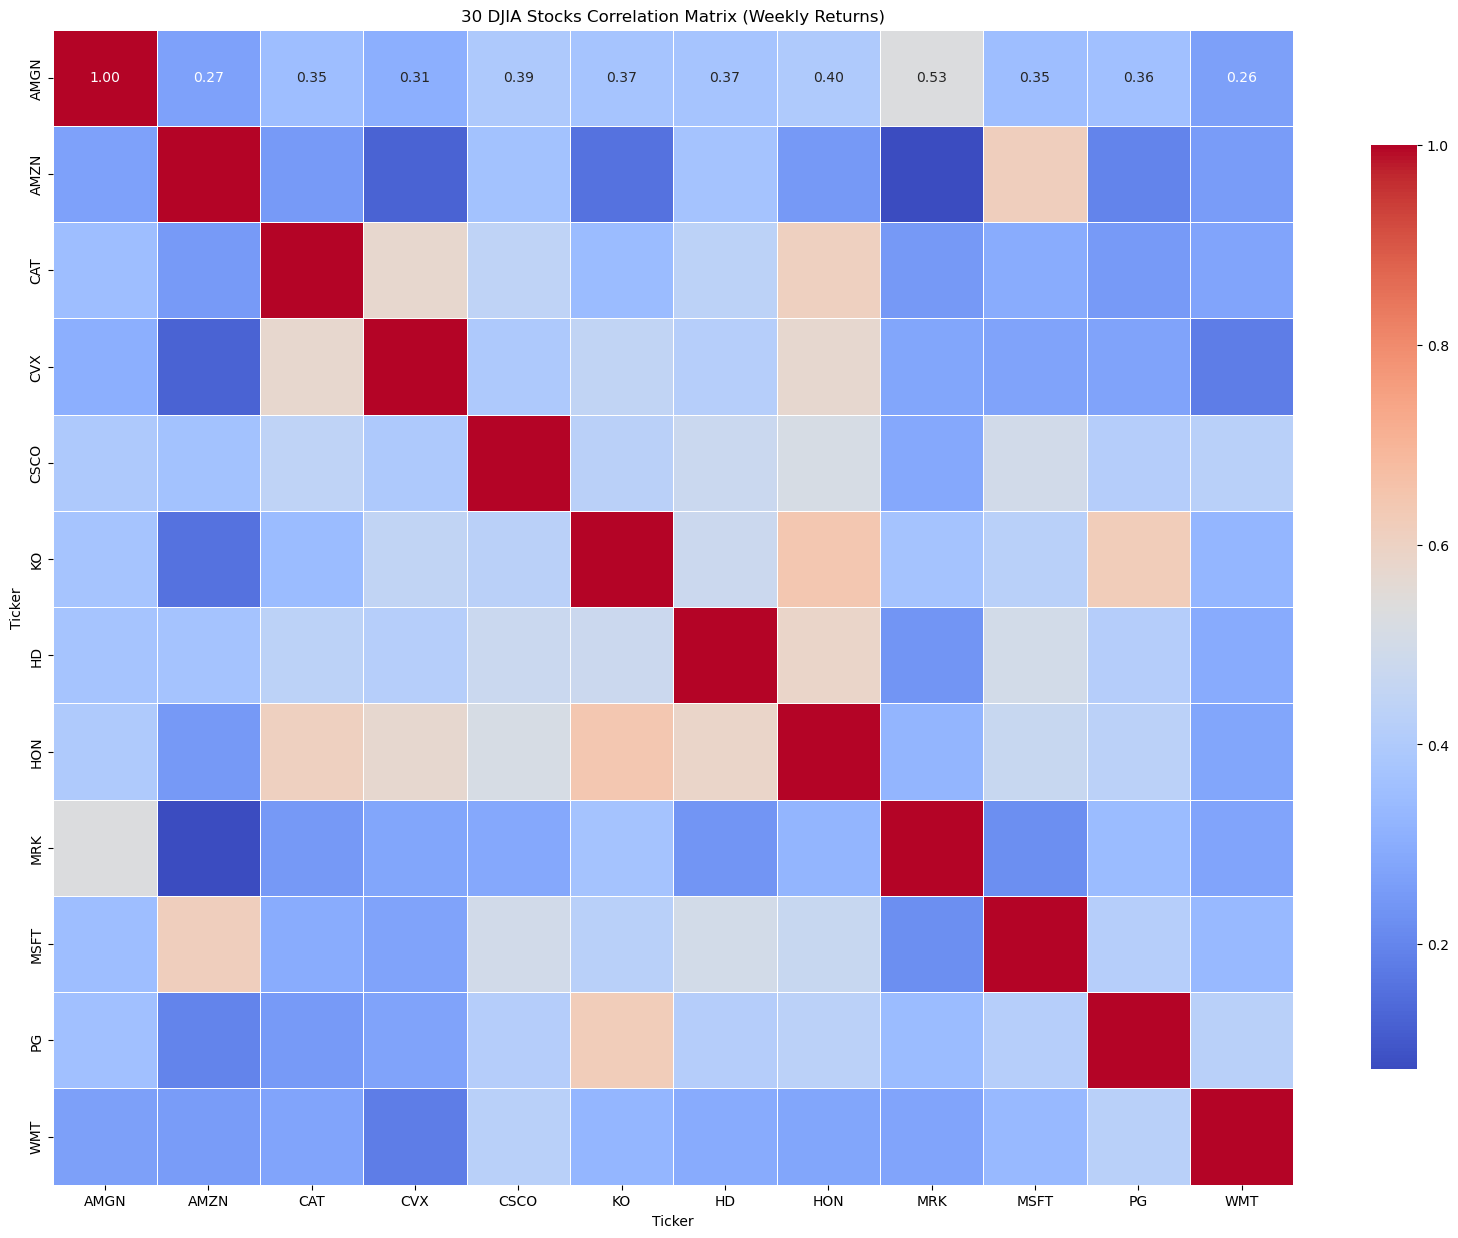

In [10]:
corr_matrix = hist_pct_ret[[t for t in init_tickers]].corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink':0.8}, linewidths=0.5)
plt.title("30 DJIA Stocks Correlation Matrix (Weekly Returns)")
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

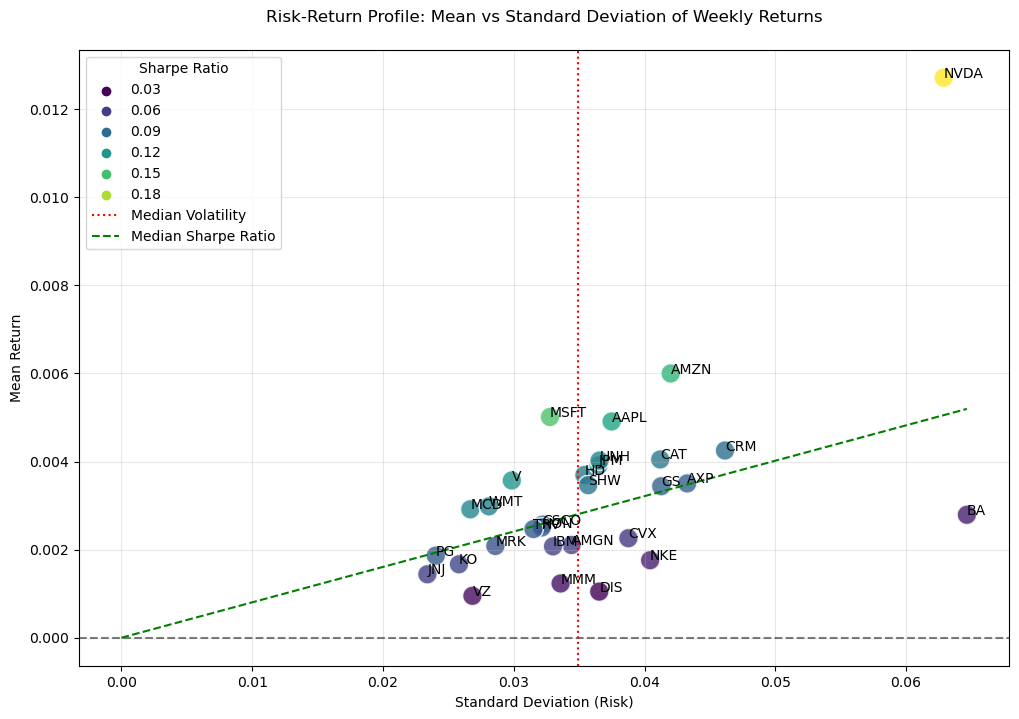

In [12]:
# Calculate metrics
metrics = hist_pct_ret.agg(['mean', 'std']).T
metrics['sharpe'] = metrics['mean'] / metrics['std']

# Create figure
plt.figure(figsize=(12,8))

# Scatter Plot
scatter = sns.scatterplot(data=metrics, x='std', y='mean', 
                          hue='sharpe', palette='viridis', 
                          s=200, alpha=0.8)

# Annotations
for i, row in metrics.iterrows():
    plt.text(row['std'], row['mean'], i, 
             fontsize=10)

# Enhancements
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(metrics['std'].median(), color='red', linestyle=':', label='Median Volatility')
plt.plot([0, metrics['std'].max()], 
         [0, metrics['std'].max()*metrics['sharpe'].median()], 
         'g--', label='Median Sharpe Ratio')

# Formatting
plt.title("Risk-Return Profile: Mean vs Standard Deviation of Weekly Returns", pad=20)
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Mean Return")
plt.legend(title='Sharpe Ratio')
plt.grid(True, alpha=0.3)

# Colorbar
norm = plt.Normalize(metrics['sharpe'].min(), metrics['sharpe'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
plt.colorbar(sm, label='Sharpe Ratio')

plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

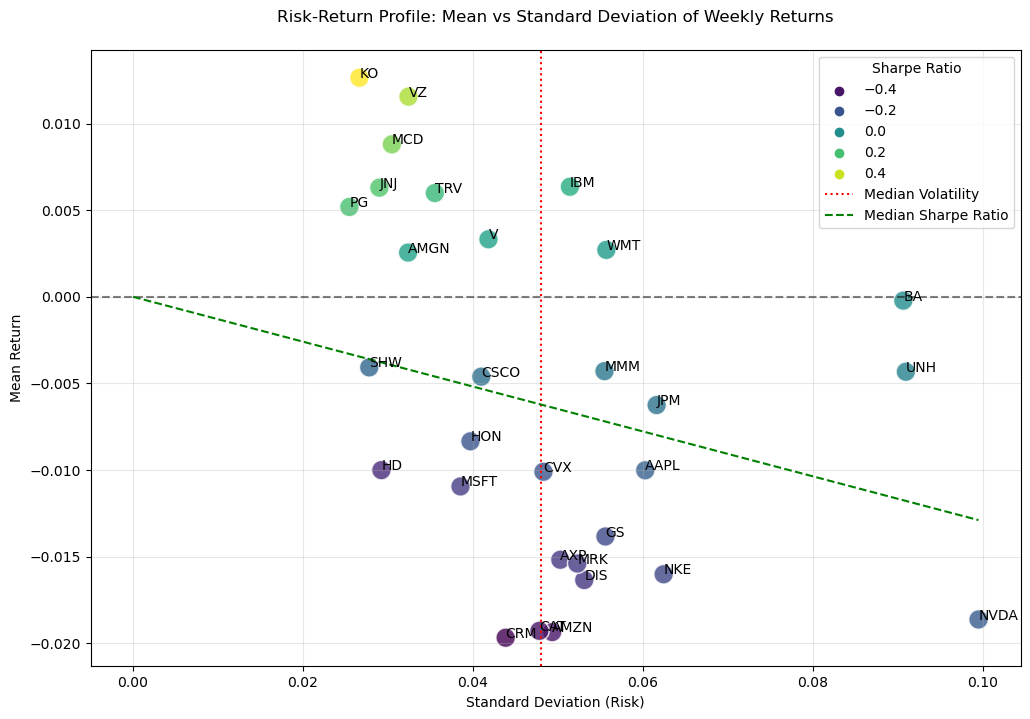

In [13]:
# Calculate metrics
metrics = trade_pct_ret.agg(['mean', 'std']).T
metrics['sharpe'] = metrics['mean'] / metrics['std']

# Create figure
plt.figure(figsize=(12,8))

# Scatter Plot
scatter = sns.scatterplot(data=metrics, x='std', y='mean', 
                          hue='sharpe', palette='viridis', 
                          s=200, alpha=0.8)

# Annotations
for i, row in metrics.iterrows():
    plt.text(row['std'], row['mean'], i, 
             fontsize=10)

# Enhancements
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.axvline(metrics['std'].median(), color='red', linestyle=':', label='Median Volatility')
plt.plot([0, metrics['std'].max()], 
         [0, metrics['std'].max()*metrics['sharpe'].median()], 
         'g--', label='Median Sharpe Ratio')

# Formatting
plt.title("Risk-Return Profile: Mean vs Standard Deviation of Weekly Returns", pad=20)
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Mean Return")
plt.legend(title='Sharpe Ratio')
plt.grid(True, alpha=0.3)

# Colorbar
norm = plt.Normalize(metrics['sharpe'].min(), metrics['sharpe'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
plt.colorbar(sm, label='Sharpe Ratio')

plt.show()